In [74]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
stock = '^GDAXI'
data = yf.download(stock,'2010-01-01','2023-05-19')
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,5975.520020,6048.299805,5974.430176,6048.299805,6048.299805,104344400
2010-01-05,6043.939941,6058.020020,6015.669922,6031.859863,6031.859863,117572100
2010-01-06,6032.390137,6047.569824,5997.089844,6034.330078,6034.330078,108742400
2010-01-07,6016.799805,6037.569824,5961.250000,6019.359863,6019.359863,133704300
2010-01-08,6028.620117,6053.040039,5972.240234,6037.609863,6037.609863,126099000


In [89]:
price = data['Close']
price

Date
2010-01-04     6048.299805
2010-01-05     6031.859863
2010-01-06     6034.330078
2010-01-07     6019.359863
2010-01-08     6037.609863
                  ...     
2023-05-12    15913.820312
2023-05-15    15917.240234
2023-05-16    15897.929688
2023-05-17    15951.299805
2023-05-18    16163.360352
Name: Close, Length: 3393, dtype: float64

<Axes: xlabel='Date'>

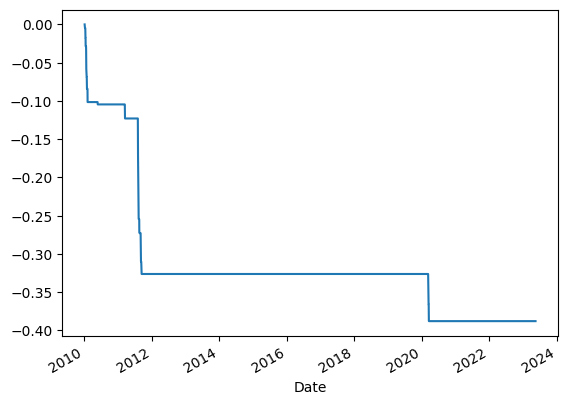

In [90]:
#Maximum Drawdown (MDD) calculation
roll_max = data['Close'].rolling(len(price)-1,min_periods=1).max()
daily_drawdown = data['Close']/roll_max - 1.0
mdd = daily_drawdown.rolling(len(price)-1,min_periods=1).min()
mdd.plot()

In [91]:
print(f"Maximum Drawdown for the given period is: {mdd[-1]*100} %")

Maximum Drawdown for the given period is: -38.779389651624484 %


In [92]:
#Cumulative returns
returns = data['Close'].resample('D').ffill().pct_change().to_numpy()
returns[0] = 0
returns

array([ 0.        , -0.00271811,  0.00040953, ..., -0.00121318,
        0.00335705,  0.01329425])

In [93]:
cumulative_ret =( 1+returns).cumprod()
cumulative_ret

array([1.        , 0.99728189, 0.99769031, ..., 2.62849564, 2.63731963,
       2.67238081])

In [94]:
print(f"Cumulative return of stock is {cumulative_ret[-1]*100}%")

Cumulative return of stock is 267.23808133710065%


In [95]:
# Sharpe ratio
yearly_returns = data['Close'].resample('Y').ffill().pct_change()
yearly_returns

Date
2010-12-31         NaN
2011-12-31   -0.146921
2012-12-31    0.290597
2013-12-31    0.254817
2014-12-31    0.026527
2015-12-31    0.095605
2016-12-31    0.068700
2017-12-31    0.125126
2018-12-31   -0.182594
2019-12-31    0.254765
2020-12-31    0.035457
2021-12-31    0.157892
2022-12-31   -0.123468
2023-12-31    0.160862
Freq: A-DEC, Name: Close, dtype: float64

In [96]:
monthly_returns = data['Close'].resample('M').ffill().pct_change()
monthly_returns

Date
2010-01-31         NaN
2010-02-28   -0.001842
2010-03-31    0.099150
2010-04-30   -0.002901
2010-05-31   -0.027930
                ...   
2023-01-31    0.086521
2023-02-28    0.015657
2023-03-31    0.017162
2023-04-30    0.018782
2023-05-31    0.015135
Freq: M, Name: Close, Length: 161, dtype: float64

In [97]:
avg_yearly_return = yearly_returns.mean()
print(f"Average yearly return is : {avg_yearly_return*100}%")

Average yearly return is : 7.825882697237144%


In [98]:
sharpe_ratio = (avg_yearly_return - 0.05)/(monthly_returns.std())
print(f"Sharpe ratio is : {sharpe_ratio*10}")

Sharpe ratio is : 5.580171095075821


In [99]:
# Sortino ratio
neg_monthly_returns = monthly_returns[monthly_returns < 0]
neg_monthly_returns

Date
2010-02-28   -0.001842
2010-04-30   -0.002901
2010-05-31   -0.027930
2010-08-31   -0.036231
2011-03-31   -0.031766
                ...   
2022-04-30   -0.021982
2022-06-30   -0.111519
2022-08-31   -0.048138
2022-09-30   -0.056144
2022-12-31   -0.032885
Name: Close, Length: 66, dtype: float64

In [100]:
std_neg = neg_monthly_returns.std()
sortino = ((avg_yearly_return - 0.05)*10.0)/std_neg
print(f"Sortino Ratio: {sortino}")

Sortino Ratio: 7.941879290279163
